In [5]:
from IPython.display import display, Image

In [6]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [7]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

In [12]:
#정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [13]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

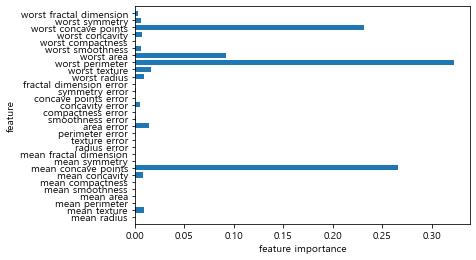

In [14]:
gbrt = GradientBoostingClassifier( random_state=0, 
                                   max_depth=1,
                                   learning_rate=0.1 )
gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

<AxesSubplot:title={'center':'feature importances'}>

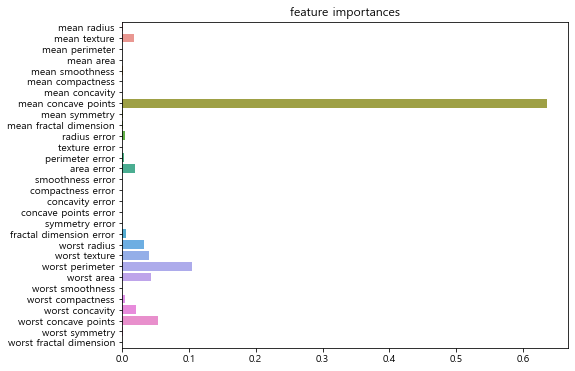

In [17]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=feature_names)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=importances.index)

### 타이타닉 데이터셋 - 그래디언트 부스팅 트리 모델 만들기

In [31]:
df = pd.read_csv("./train.csv")

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
from sklearn.model_selection import train_test_split

X = df[['Pclass', 'Fare', 'SibSp']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
model.feature_importances_

array([0.27473129, 0.66623849, 0.05903023])

In [25]:
#특성(피처) 중요도 : 트리에서 얼마나 중요하게 사용되었는가
# 변수 이름: sel

sel = ['Pclass', 'Fare', 'SibSp']


In [27]:
val = model.feature_importances_
imp = pd.Series(val, index=sel)
imp

Pclass    0.274731
Fare      0.666238
SibSp     0.059030
dtype: float64

<AxesSubplot:>

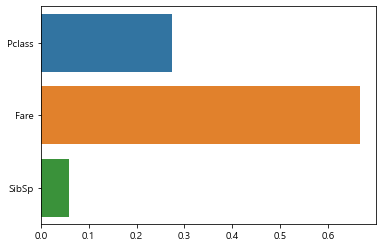

In [28]:
sns.barplot(x=imp, y=imp.index)